# Data Wrangling and Exploratory Data Analysis

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## The Showdown Dataset

Our dataset consists of records of a person's Pokemon battle, their team, and
whether they won or lost that battle.

While the a battle consists of two players each with their own unique features, we will delimit
our study to the scope of one person and base our analyses from there.

We do this because we mostly want to focus on identifying patterns on how a player builds their
teams given the meta irrespective of the other team. In Pokemon Showdown, teams are built
independently before players challenge each other and are not built "on the fly".

In [99]:
showdown_df = pd.read_csv("./dataset/showdown/showdown.csv")
showdown_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Tag          5000 non-null   int64 
 1   Player       5000 non-null   object
 2   Elo          5000 non-null   int64 
 3   Pokemon 1    5000 non-null   object
 4   Pokemon 2    5000 non-null   object
 5   Pokemon 3    5000 non-null   object
 6   Pokemon 4    5000 non-null   object
 7   Pokemon 5    5000 non-null   object
 8   Pokemon 6    5000 non-null   object
 9   LeadPokemon  4987 non-null   object
 10  TurnCount    5000 non-null   int64 
 11  Result       5000 non-null   object
dtypes: int64(3), object(9)
memory usage: 468.9+ KB


In [100]:
for column in ["Player", *[f"Pokemon {i}" for i in range(1,7)], "LeadPokemon", "Result"]:
    showdown_df[column] = showdown_df[column].astype("str")
showdown_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Tag          5000 non-null   int64 
 1   Player       5000 non-null   object
 2   Elo          5000 non-null   int64 
 3   Pokemon 1    5000 non-null   object
 4   Pokemon 2    5000 non-null   object
 5   Pokemon 3    5000 non-null   object
 6   Pokemon 4    5000 non-null   object
 7   Pokemon 5    5000 non-null   object
 8   Pokemon 6    5000 non-null   object
 9   LeadPokemon  5000 non-null   object
 10  TurnCount    5000 non-null   int64 
 11  Result       5000 non-null   object
dtypes: int64(3), object(9)
memory usage: 468.9+ KB


### Duplicate players

After formatting the columns, we have realized that while all the matches 
are different, multiple battles from the same players have been collected.

As we can see, some players prefer to use the exact same team composition
using the same Pokemon in different battles. This would lead to bias to
certain Pokemon and team compositions in general, as a player's reference
does not necessarily correlate with the actual meta determined by the community.

In order to not skew the data to the preferences/team-building of some players,
we have chosen to drop these duplicate players in order to get a better view of
the community.

In [101]:
team_cols = ["Player"] + [f"Pokemon {i}" for i in range(1, 7)]
showdown_df[showdown_df.duplicated(subset=team_cols, keep=False)].sort_values(by="Player")

,Tag,Player,Elo,Pokemon 1,Pokemon 2,Pokemon 3,Pokemon 4,Pokemon 5,Pokemon 6,LeadPokemon,TurnCount,Result
4852,95498129,(LoD)Marcos,1444,Gengar,Volcarona,Salamence,Jirachi,Mienshao,Scrafty,Gengar,37,lose
4847,95190427,(LoD)Marcos,1392,Gengar,Volcarona,Salamence,Jirachi,Mienshao,Scrafty,Gengar,18,win
1717,2080451177,123perejil123,1325,Tyranitar,Landorus-Therian,Excadrill,Clefable,Latios,Slowbro,Latios,2,win
1647,2069514743,123perejil123,1325,Tyranitar,Landorus-Therian,Excadrill,Clefable,Latios,Slowbro,Latios,2,win
3288,2293763103,133fcsq,1464,Politoed,Keldeo,Latios,Starmie,Thundurus-Therian,Jirachi,Keldeo,25,win
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,171229752,yusei38,1268,Politoed,Skarmory,Espeon,Kyurem-Black,Blissey,Jolteon,Jolteon,21,win
3827,2363527686,zerqaq,1368,Landorus-Therian,Politoed,Starmie,Ferrothorn,Jirachi,Latios,Politoed,16,win
3826,2363486536,zerqaq,1347,Landorus-Therian,Politoed,Starmie,Ferrothorn,Jirachi,Latios,Landorus-Therian,28,win
71,101724423,Śhofũ,1434,Politoed,Chansey,Skarmory,Tentacruel,Celebi,Tangrowth,Chansey,148,win


In [102]:
unique_players_df = showdown_df.drop_duplicates(subset="Player", keep="first")
unique_players_df

,Tag,Player,Elo,Pokemon 1,Pokemon 2,Pokemon 3,Pokemon 4,Pokemon 5,Pokemon 6,LeadPokemon,TurnCount,Result
0,1000949555,HaxerShouldAllDie,1444,Infernape,Breloom,Tyranitar,Jellicent,Bronzong,Reuniclus,Infernape,24,lose
2,100157536,BigBadLeroyBrown,1306,Tyranitar,Alakazam,Latios,Ferrothorn,Landorus-Therian,Excadrill,Tyranitar,31,win
3,1001647389,testing4g4in,1488,Tyranitar,Amoonguss,Starmie,Alakazam,Heatran,Skarmory,Starmie,22,lose
4,100171063,bossaru2,1377,Tyranitar,Stoutland,Forretress,Salamence,Gliscor,Breloom,Breloom,24,lose
5,100192677,jo0n vo0ight,1312,Tornadus,Politoed,Tentacruel,Dugtrio,Ferrothorn,Jirachi,Tornadus,22,lose
...,...,...,...,...,...,...,...,...,...,...,...,...
4981,991306568,shiny peoples,1304,Politoed,Amoonguss,Excadrill,Thundurus-Therian,Keldeo,Ferrothorn,Politoed,22,lose
4983,99232112,My Nostalgic Past,1268,Politoed,Gyarados,Jolteon,Ferrothorn,Haxorus,Umbreon,Politoed,71,win
4987,99352898,Sneakypanda,1393,Scizor,Togekiss,Hippowdon,Infernape,Terrakion,Sableye,Infernape,25,lose
4988,993678093,Caster33,1287,Tyranitar,Garchomp,Heatran,Conkeldurr,Forretress,Jellicent,Garchomp,14,win


### Forfeit matches

Some records report no `LeadPokemon`. These indicate that the match ended
prematurely, before the player sent out a Pokemon in the first place, likely due
to disconnection issues or one of the players forfeit the match.

Nevertheless, data from "battles" like these can still be used to identify
trends in team building from people of different elo levels.

(I'm sure there are instances where we'd have to drop these though, as we
previously mentioned)

In [103]:
showdown_df[showdown_df["TurnCount"] == 0]

,Tag,Player,Elo,Pokemon 1,Pokemon 2,Pokemon 3,Pokemon 4,Pokemon 5,Pokemon 6,LeadPokemon,TurnCount,Result
69,101708749,WeForneMon,1660,Latios,Lucario,Gengar,Gastrodon,Heatran,Skarmory,nan,0,lose
377,1082937854,hgfjhds,1532,Tyranitar,Landorus-Therian,Rotom-Wash,Jirachi,Latios,Keldeo,nan,0,lose
798,1139401705,Wally,1653,Garchomp,Rotom-Wash,Tyranitar,Scizor,Latios,Terrakion,nan,0,win
811,1141004806,Wally,1653,Garchomp,Rotom-Wash,Tyranitar,Scizor,Latios,Terrakion,nan,0,win
1027,121892059,ALnlef,1307,Gliscor,Politoed,Rotom-Wash,Ferrothorn,Tentacruel,Tornadus,nan,0,lose
1307,2033253771,yusei38,1333,Politoed,Skarmory,Espeon,Kyurem-Black,Blissey,Jolteon,nan,0,win
1530,2058219606,yusei38,1333,Politoed,Skarmory,Espeon,Kyurem-Black,Blissey,Jolteon,nan,0,win
1667,2073047615,authentise_is_shit,1507,Politoed,Jellicent,Excadrill,Tornadus,Gastrodon,Ferrothorn,nan,0,lose
2283,2145224095,rabian,1345,Jolteon,Ferrothorn,Politoed,Gyarados,Toxicroak,Tentacruel,nan,0,lose
4052,588117142,Jack314,1314,Breloom,Garchomp,Latios,Jirachi,Rotom-Wash,Tyranitar,nan,0,lose


### Ties

Matches do not always end in wins or losses; they can be ties, too.

In [104]:
showdown_df[showdown_df['Result'] == 'tie']

,Tag,Player,Elo,Pokemon 1,Pokemon 2,Pokemon 3,Pokemon 4,Pokemon 5,Pokemon 6,LeadPokemon,TurnCount,Result
387,1083803355,professorcaralho,1390,Politoed,Latios,Rotom-Wash,Breloom,Jirachi,Scizor,Rotom-Wash,30,tie
796,113898835,professorcaralho,1390,Politoed,Latios,Rotom-Wash,Breloom,Jirachi,Scizor,Rotom-Wash,30,tie
4803,93999693,Volta,1329,Dragonite,Keldeo,Scizor,Terrakion,Latios,Garchomp,Terrakion,27,tie
4807,94150142,Volta,1329,Dragonite,Keldeo,Scizor,Terrakion,Latios,Garchomp,Terrakion,27,tie


### Lead Pokemon

Another thing we would like to observe is which Pokemon is brought
out first. For this, we will use a bar graph and get the mode.

<Axes: xlabel='LeadPokemon'>

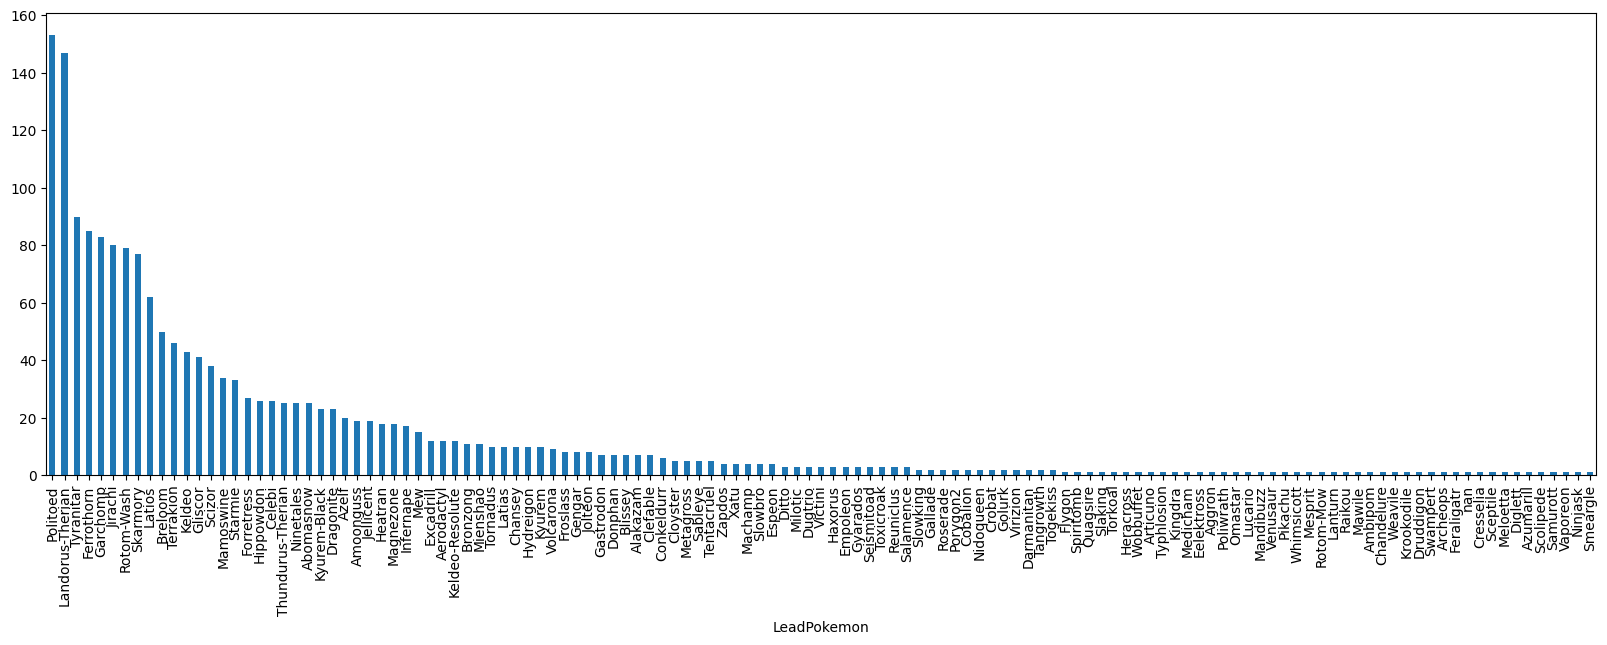

In [105]:
showdown_df["LeadPokemon"].value_counts()
unique_players_df["LeadPokemon"].value_counts().plot(kind="bar", figsize=(20, 6))

In [106]:
unique_players_df["LeadPokemon"].value_counts()

LeadPokemon
Politoed            153
Landorus-Therian    147
Tyranitar            90
Ferrothorn           85
Garchomp             83
                   ... 
Scolipede             1
Samurott              1
Vaporeon              1
Ninjask               1
Smeargle              1
Name: count, Length: 127, dtype: int64

As seen in the graph and the counts, most players choose to use Politoed
as their lead Pokemon, closely followed by Landorus-Therian, with the following
choices being at least 38.8% less frequently used.